In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from base_regressor import BaseRegressor

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.preprocessing import StandardScaler


# Definir el wrapper para MLPRegressor
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self,
                 layer1=None,
                 layer2=None,
                 num_hl=None,
                 batch_size=None,
                 activation=None,
                 solver=None,
                 learning_rate=None,
                 learning_rate_init=None,
                 alpha=None):
        self.layer1 = layer1
        self.layer2 = layer2
        self.num_hl = num_hl
        self.batch_size = batch_size
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.learning_rate_init = learning_rate_init
        self.alpha = alpha

    def fit(self, x_train, y_train):
        model_mlp = MLPRegressor(
            hidden_layer_sizes=[self.layer1, self.layer2][-1*self.num_hl:],
            max_iter=300,
            activation=self.activation,
            batch_size=self.batch_size,
            solver=self.solver,
            learning_rate=self.learning_rate,
            learning_rate_init=self.learning_rate_init,
            alpha=self.alpha
        )
        model_mlp.fit(x_train, y_train)
        self.model = model_mlp
        return self

    def predict(self, x_train):
        return self.model.predict(x_train)

    def score(self, x_train, y_train):
        return self.model.score(x_train, y_train)
    


class MLPRegressorCustom(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = MLPWrapper
        if params is None:
            self.params = {
                'layer1': 100,
                'layer2': 50,
                'num_hl': 1,
                'batch_size': 32,
                'activation': 'tanh',
                'solver': 'adam',
                'alpha': 0.0001,
                'learning_rate': 'adaptive',
                'learning_rate_init': 0.001,
                'max_iter': 200
            }
        if params_space is None:
            self.params_space = {
                'layer1': Integer(1000, 2000),
                'layer2': Integer(300, 1000),
                'num_hl': Integer(1, 2),
                'batch_size': Categorical([8, 32, 128, 256, 512]),
                'activation': Categorical(['relu', 'tanh', 'logistic']),
                'solver': Categorical(['adam', 'lbfgs', 'sgd']),
                'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
                'learning_rate': Categorical(['constant', 'adaptive', 'invscaling']),
                'learning_rate_init': Real(1e-4, 1e-2, prior='log-uniform')
            }

        self.scaler=StandardScaler()


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle
#from mlp_regressor_custom import MLPRegressorCustom  # Asegúrate de importar correctamente tu clase personalizada

#save_path=f'{path}MLP/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

# Leer el dataframe desde el archivo Excel
df = pd.read_excel(file_path)

# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)

# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo MLPRegressorCustom
mlp_model = MLPRegressorCustom()

# Establecer los datos en el modelo (preprocesamiento y división en entrenamiento y prueba)
mlp_model.set_data(X, y)

In [7]:
mlp_model.X_test

,Alpha2_canon_EPP_HPC_left,Alpha2_canon_EPP_HPC_right,Alpha2_canon_EPP_PARIET_left,Alpha2_canon_EPP_PARIET_right,Alpha2_canon_EPP_OCC_left,Alpha2_canon_EPP_OCC_right,Alpha2_canon_RPD_HPC_left,Alpha2_canon_RPD_HPC_right,Alpha2_canon_RPD_CING_left,Alpha2_canon_RPD_CING_right,...,IAF_MFG_left,IAF_MFG_right,IAF_SFG_left,IAF_SFG_right,IAF_HPC_left,IAF_HPC_right,IAF_INS_left,IAF_INS_right,IAF_OCC_left,IAF_OCC_right
986,0.273696,-0.182595,-1.085129,-1.044572,-0.272264,-0.464957,0.273696,-0.182595,-1.072232,-1.043807,...,-0.910680,-0.874157,-1.039601,-0.603336,-0.199929,0.628585,-1.081845,-0.300901,-0.840835,-0.136245
1363,0.345507,0.715623,-0.113246,0.474541,0.586371,0.583762,0.345507,0.715623,0.260680,0.388133,...,-0.910680,-0.874157,-0.975476,-1.055733,-1.071371,-1.059903,-1.081845,-1.098476,-1.184941,-1.359590
616,-0.549297,-0.704855,-0.891528,-0.971245,-0.735004,-0.819686,-0.549297,-0.704855,-1.051052,-1.082345,...,2.059546,0.463056,1.397157,2.240300,1.542953,-0.215659,1.312049,-1.098476,-0.840835,-0.878990
931,-0.831038,1.497887,-0.773301,-0.460169,-0.557503,-0.765315,-0.831038,1.497887,-0.940107,0.004590,...,2.744983,2.691744,3.064412,3.015837,2.414394,2.106012,2.110014,2.091825,-0.668782,-0.747917
60,-1.605460,-1.857803,-1.869605,-1.902070,-1.658037,-1.863670,-1.605460,-1.857803,-2.039889,-2.038112,...,-0.453722,-0.428420,-0.526600,-0.538708,-0.635650,-0.637781,-0.682862,-0.699688,-0.840835,-0.835299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2.058240,2.332141,0.742819,0.886768,0.704666,1.396328,2.058240,2.332141,1.377675,1.608344,...,2.516504,2.468875,2.872036,1.852531,1.107232,0.558231,0.613830,0.396978,-0.926862,-0.223626
726,-0.118778,0.331169,-0.105239,-0.045648,-0.085594,-0.169189,-0.118778,0.331169,0.065249,0.083306,...,-0.225243,0.463056,0.435278,0.366085,-0.780890,-0.004598,-0.383626,-0.201204,-1.356994,-1.097444
599,-0.335972,0.052384,-0.590696,-0.995944,-0.610650,-0.313050,-0.335972,0.052384,-0.316846,-0.160571,...,-0.567962,-0.874157,-0.718975,-0.797221,0.889372,2.106012,-1.081845,2.091825,1.524892,1.305555
553,-0.826596,-0.961609,-0.637371,-0.260053,-0.814231,-0.985561,-0.826596,-0.961609,-0.409300,-0.270347,...,-0.567962,-0.874157,-1.039601,-0.021683,2.414394,1.613536,2.110014,0.496674,2.772276,0.693883


In [ ]:
opt_mlp, best_params_mlp = mlp_model.SearchBestModel(n_iter_=10, early_stop=True, save_result=False)


In [ ]:
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/MLP/Modelos/opt_MLP_model_400iter.pickle', 'wb') as file:
 #       pickle.dump(opt_mlp, file)

In [6]:
with open(f'{path}Opt_Model/opt_MLP_model_400iter.pickle', 'rb') as file:
    opt_mlp= pickle.load(file)

In [9]:
resultados = opt_mlp.cv_results_
mlp_model.guardar_resultados_busqueda(resultados=resultados)

C:\Users/felipe/Documents/Brain\base_regressor.py:309: RuntimeWarning: overflow encountered in exp
  return C * (1-np.exp(-t / tau)) + b


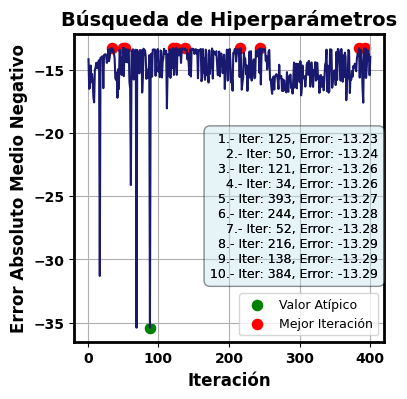

Top 1: Iteración 125, Error -13.232383034487077
Top 2: Iteración 50, Error -13.241145787428769
Top 3: Iteración 121, Error -13.258067110250863
Top 4: Iteración 34, Error -13.260045218111904
Top 5: Iteración 393, Error -13.273332749550672
Top 6: Iteración 244, Error -13.279128673423973
Top 7: Iteración 52, Error -13.282042412880466
Top 8: Iteración 216, Error -13.287659987805801
Top 9: Iteración 138, Error -13.288047063768634
Top 10: Iteración 384, Error -13.290194226452291


In [6]:
mlp_model.plot_search_best_model(opt_mlp, linewidth=1.5, color='midnightblue')

In [7]:
best_params_mlp = mlp_model.best_hyper(opt_mlp)

In [8]:
best_params_mlp

[{'activation': 'logistic',
  'alpha': 0.00013162771662733779,
  'batch_size': 128,
  'layer1': 1584,
  'layer2': 644,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.000663303587547726,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 1e-05,
  'batch_size': 32,
  'layer1': 1027,
  'layer2': 300,
  'learning_rate': 'constant',
  'learning_rate_init': 0.00015603214769031388,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 7.644435372446218e-05,
  'batch_size': 128,
  'layer1': 1581,
  'layer2': 662,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0005741978071264057,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 4.7723678262435505e-05,
  'batch_size': 128,
  'layer1': 1991,
  'layer2': 862,
  'learning_rate': 'adaptive',
  'learning_rate_init': 0.0006429052672680192,
  'num_hl': 2,
  'solver': 'sgd'},
 {'activation': 'logistic',
  'alpha': 7.134914302817331e-05,
  'batch_size': 128,
  'layer

# Trainer

In [ ]:
results, best_model_results , best_model= mlp_model.trainer(params_=best_params_mlp[0])

In [9]:
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/results_MLP_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [9]:
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/BestModel_MLP_all_features.pickle', 'rb') as file:
    best_model =  pickle.load(file)

In [43]:
mlp_model.guardar_resultados_trainer(resultados=results)

In [10]:
mlp_model.model=best_model

In [11]:
y_pred = mlp_model.predicter(mlp_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.97e-29
Time:                        20:13:41   Log-Likelihood:                -1061.2
No. Observations:                 276   AIC:                             2126.
Df Residuals:                     274   BIC:                             2134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0690      1.748     16.634      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


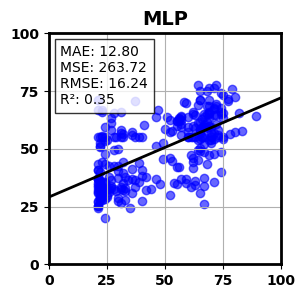

Error medio absoluto: 12.795603378532837
Error cuadrático medio: 263.72457919743346
Raíz del error cuadrático medio: 16.239599108273378
Coeficiente de determinación (R²): 0.3483572402292713


In [12]:
mlp_model.plot_regresion(y=y_pred,x= mlp_model.y_test, x_size=3,y_size=3,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0, title='MLP',label=False,color='blue', color_line_fit="black", line_ideal=False,confidence_interval=False,legend=False,alpha=0.6)


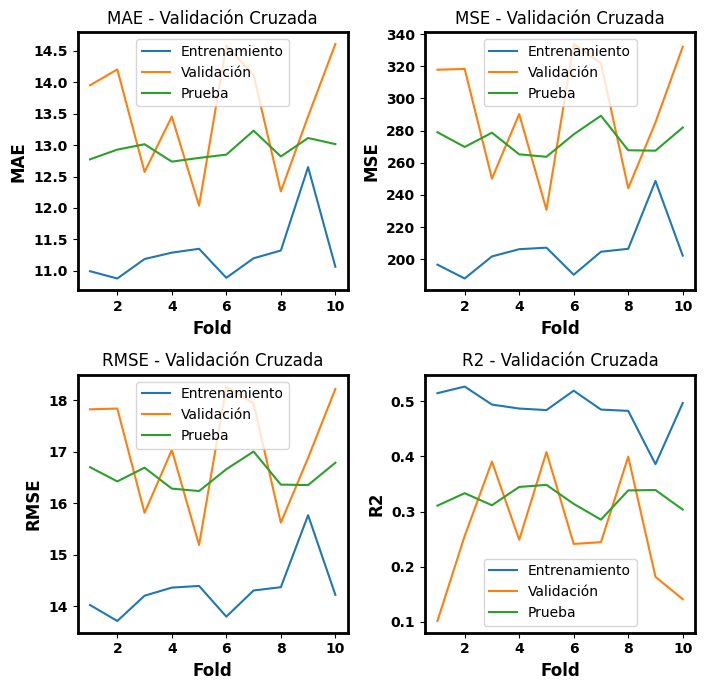

In [14]:
mlp_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.97e-29
Time:                        20:13:59   Log-Likelihood:                -1061.2
No. Observations:                 276   AIC:                             2126.
Df Residuals:                     274   BIC:                             2134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0690      1.748     16.634      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


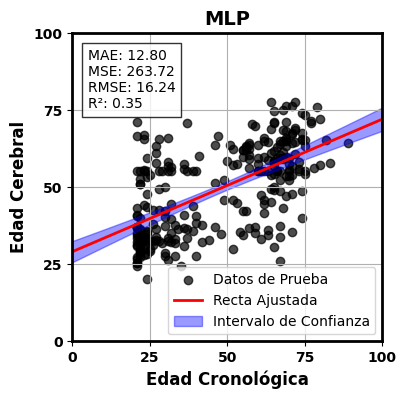

Error medio absoluto: 12.795603378532837
Error cuadrático medio: 263.72457919743346
Raíz del error cuadrático medio: 16.239599108273378
Coeficiente de determinación (R²): 0.3483572402292713


In [13]:
mlp_model.plot_regresion(y=y_pred,x= mlp_model.y_test,label_='Datos de Prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='MLP',line_ideal=False,confidence_interval=True, color= 'black',alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [10]:
shap_values, shap_summary_sorted = mlp_model.feature_importance_shap(X_test = mlp_model.X_test, model = mlp_model.model)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPWrapper(activation='logistic', alpha=0.00013162771662733779, batch_size=128,
           layer1=1584, layer2=644, learning_rate='adaptive',
           learning_rate_init=0.000663303587547726, num_hl=2, solver='sgd')


  0%|          | 0/276 [00:00<?, ?it/s]c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  0%|          | 1/276 [00:02<09:21,  2.04s/it]c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
  1%|          | 2/276 [00:04<09:37,  2.11s/it]c:\Users\felipe\Documents\Brain_Age_\brain_age_env\

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 1604.9650169730876
Low_subj_spec_EPP_CING_left: 1201.2650451337952
Low_subj_spec_EPP_HPC_right: 979.5681643890015
Low_subj_spec_RPD_OCC_right: 942.3538452553929
Low_subj_spec_RPD_CING_right: 908.8535564845627
TF_HPC_right: 850.4626481665431
TF_MFG_right: 842.375870078119
Low_subj_spec_RPD_PARIET_right: 826.0442712067257
Alpha2_canon_EPP_HPC_left: 726.5221252763852
Alpha2_canon_RPD_HPC_left: 723.5765048539046
IAF_OCC_left: 715.9618389872245
Alpha2_canon_EPP_OCC_right: 714.6110510189689
Alpha2_canon_RPD_OCC_right: 704.0723548267525
High_subj_spec_RPD_CING_right: 680.0744357378325
High_subj_spec_EPP_CING_right: 669.5040895475818
Low_subj_spec_EPP_HPC_left: 653.5891692526227
Low_subj_spec_EPP_PARIET_left: 628.3340751472548
Low_subj_spec_RPD_CING_left: 627.80785581737
IAF_OCC_right: 595.3303708922622
TF_SFG_right: 554.8590584997631
Low_subj_spec_EPP_OCC_right: 552.299858571295
IAF_HPC_right: 539.45673

In [15]:
shap_summary_sorted

[('Low_subj_spec_RPD_OCC_left', 1605.8982928569785),
 ('Low_subj_spec_EPP_CING_left', 1195.1860464399226),
 ('Low_subj_spec_EPP_HPC_right', 973.4907240609671),
 ('Low_subj_spec_RPD_OCC_right', 944.579494430714),
 ('Low_subj_spec_RPD_CING_right', 907.3511555571645),
 ('TF_HPC_right', 844.2731531362831),
 ('TF_MFG_right', 843.9047419890629),
 ('Low_subj_spec_RPD_PARIET_right', 826.4896504996124),
 ('Alpha2_canon_EPP_HPC_left', 723.9502945747117),
 ('Alpha2_canon_RPD_HPC_left', 720.5922570537972),
 ('Alpha2_canon_EPP_OCC_right', 715.7290456219301),
 ('IAF_OCC_left', 715.2464724041278),
 ('Alpha2_canon_RPD_OCC_right', 699.9887476123068),
 ('High_subj_spec_RPD_CING_right', 675.808860621004),
 ('High_subj_spec_EPP_CING_right', 667.8357170024804),
 ('Low_subj_spec_EPP_HPC_left', 654.2220444667522),
 ('Low_subj_spec_RPD_CING_left', 633.8338292707188),
 ('Low_subj_spec_EPP_PARIET_left', 628.1361946670511),
 ('IAF_OCC_right', 597.7838677168065),
 ('TF_SFG_right', 555.9332571445179),
 ('Low_subj_

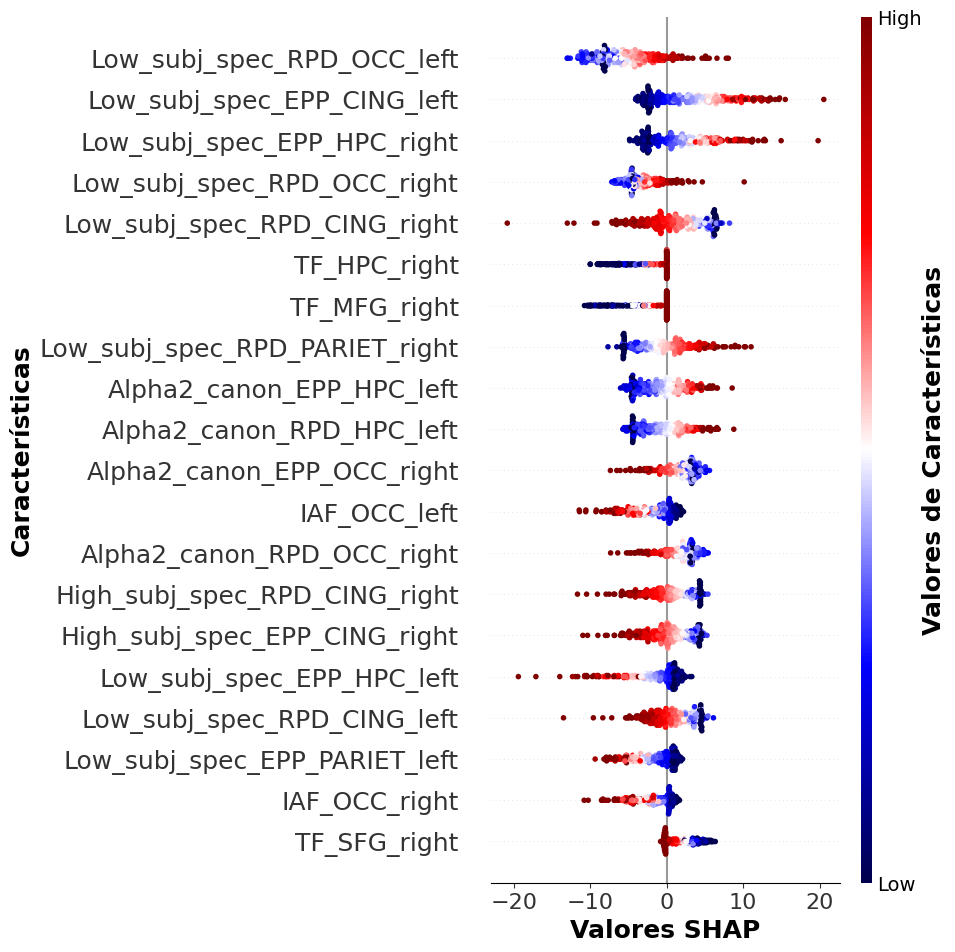

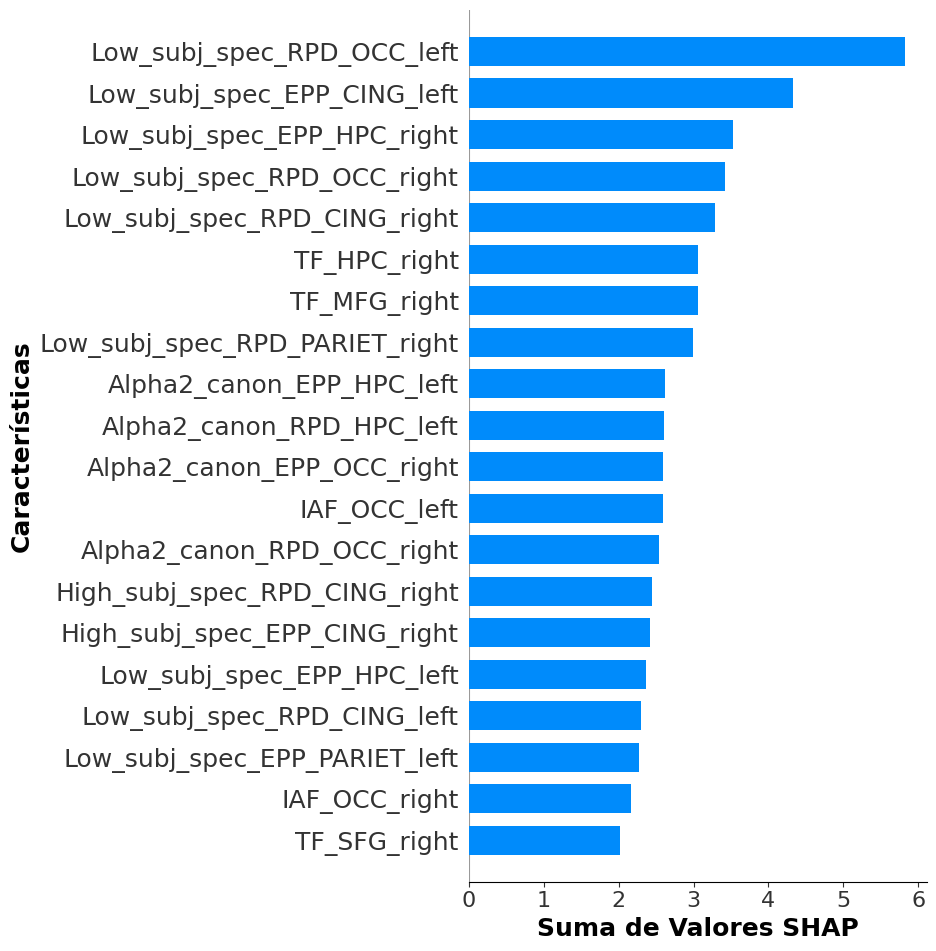

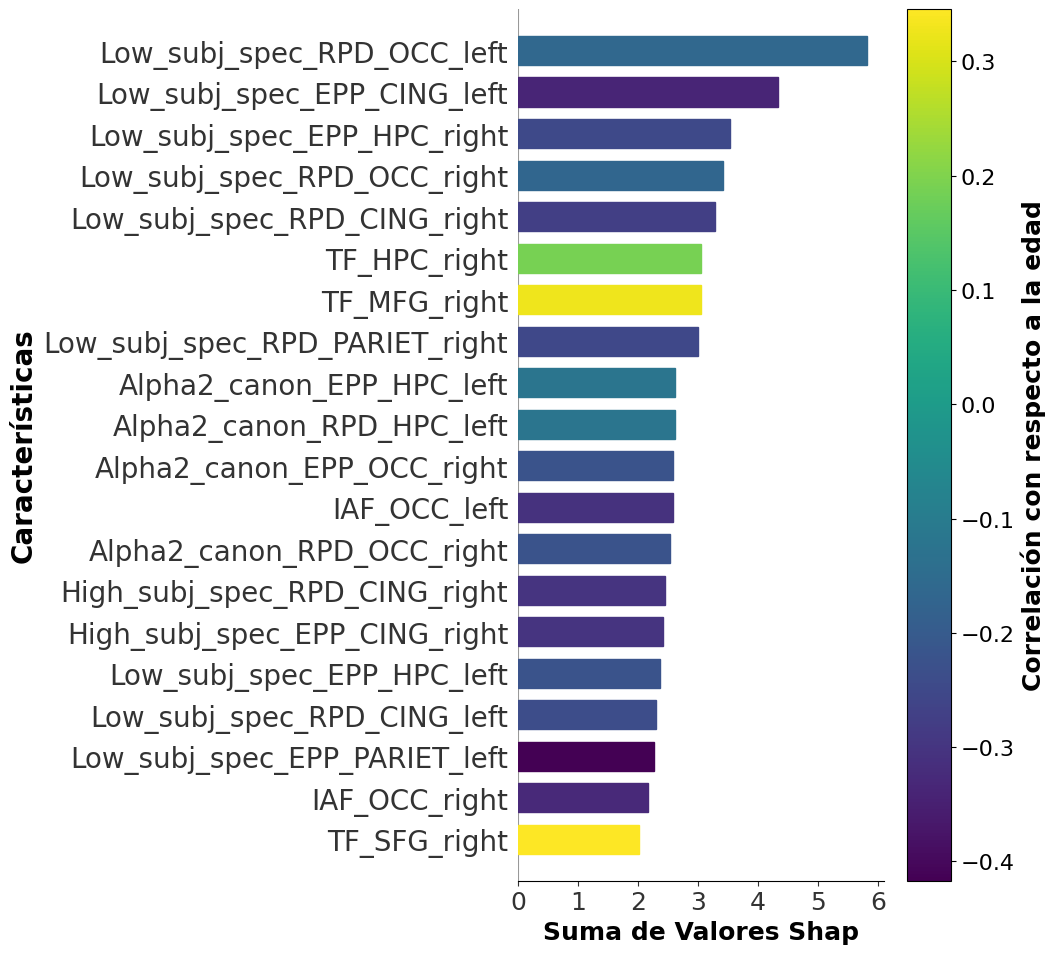

In [16]:
mlp_model.plot_feature_importance(shap_values=shap_values,X_test=mlp_model.X_test,y_test=mlp_model.y_test, save_fig=True)

In [17]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_mlp.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

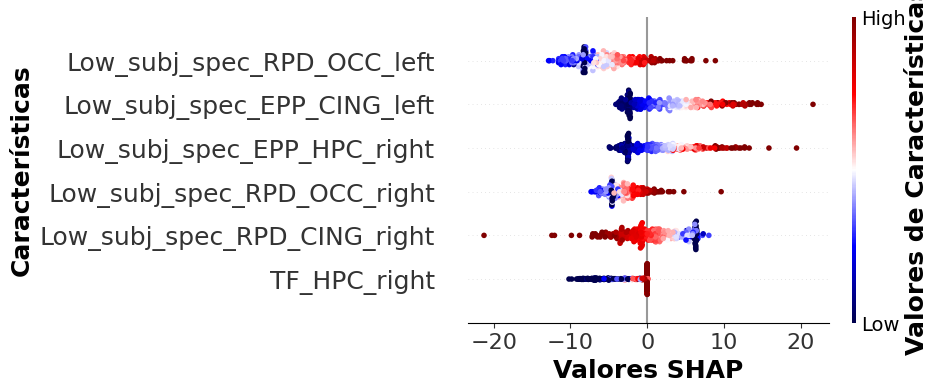

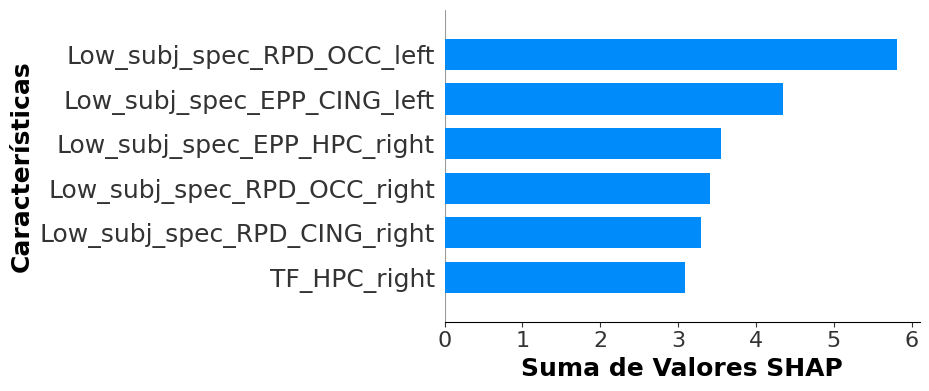

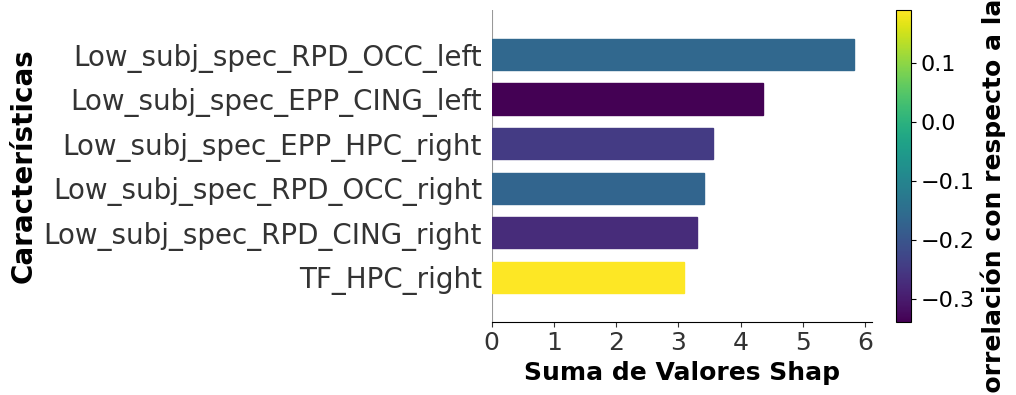

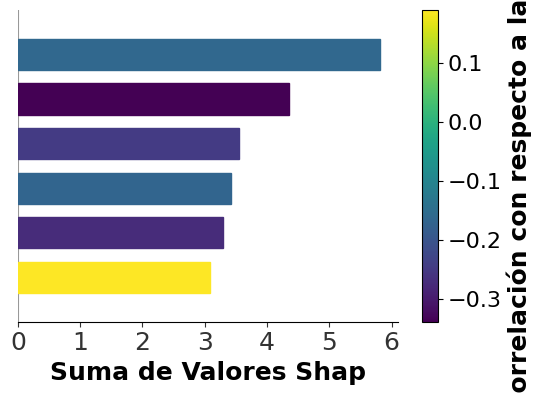

In [11]:
mlp_model.plot_feature_importance(shap_values=shap_values,X_test=mlp_model.X_test,y_test=mlp_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_mlp.pickle', 'rb') as file:
    shap_summary_sorted_mlp = pickle.load(file)



In [4]:
shap_por_region_sorted, resultado_normalizado_sorted=mlp_model.shap_region(shap_summary_sorted=shap_summary_sorted_mlp, num_max=20)

OCC_right: 1.000000
OCC_left: 0.784679
CING_right: 0.760965
HPC_left: 0.709502
CING_left: 0.618313
HPC_right: 0.614508
MFG_right: 0.285288
PARIET_right: 0.279401
PARIET_left: 0.212346
SFG_right: 0.187937


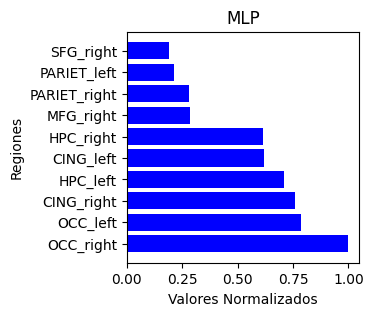

In [5]:
mlp_model.plot_normalized_values(resultado_normalizado_sorted, color='blue', name_set='MLP',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


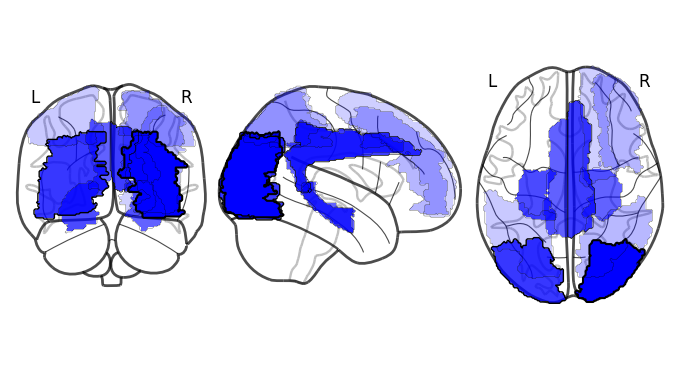

In [6]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

mlp_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='blue')